# 2023.08.11.

In [1]:
import sys

full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
sys.path.append(full_path_to_modul_dir)

In [2]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
import pandas as pd

import plots
import filter_traces

date = "23_08_11"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
# home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")

Some formatting here, click on the "..." to reveal

In [3]:
rcParams['figure.constrained_layout.use'] = False
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'stix'
rcParams['mathtext.rm'] = 'serif'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['xtick.major.pad'] = 4
rcParams['xtick.minor.pad'] = 0.5
rcParams['ytick.major.pad'] = 2
rcParams['ytick.minor.pad'] = 0.5
rcParams['axes.labelsize'] = 10
rcParams['axes.titlepad'] = 8.0
rcParams['axes.labelpad'] = 2.0
rcParams['agg.path.chunksize'] = 10000

In [4]:
rcParams['font.size'] = 14
rcParams['ytick.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['axes.labelsize'] = 10

In [5]:
from matplotlib.collections import LineCollection

cmap_geo32_opaque = ListedColormap(np.array([[255 / 255, 255 / 255, 255 / 255, 1],
                                             [255 / 255, 235 / 255, 235 / 255, 1],
                                             [255 / 255, 215 / 255, 215 / 255, 1],
                                             [255 / 255, 196 / 255, 196 / 255, 1],
                                             [245 / 255, 179 / 255, 174 / 255, 1],
                                             [255 / 255, 158 / 255, 158 / 255, 1],
                                             [255 / 255, 124 / 255, 124 / 255, 1],
                                             [255 / 255, 90 / 255, 90 / 255, 1],
                                             [238 / 255, 80 / 255, 78 / 255, 1],
                                             [244 / 255, 117 / 255, 75 / 255, 1],
                                             [255 / 255, 160 / 255, 69 / 255, 1],
                                             [255 / 255, 189 / 255, 87 / 255, 1],
                                             [247 / 255, 215 / 255, 104 / 255, 1],
                                             [240 / 255, 236 / 255, 121 / 255, 1],
                                             [223 / 255, 245 / 255, 141 / 255, 1],
                                             [205 / 255, 255 / 255, 162 / 255, 1],
                                             [172 / 255, 245 / 255, 168 / 255, 1],
                                             [138 / 255, 236 / 255, 174 / 255, 1],
                                             [124 / 255, 235 / 255, 200 / 255, 1],
                                             [106 / 255, 235 / 255, 225 / 255, 1],
                                             [97 / 255, 225 / 255, 240 / 255, 1],
                                             [68 / 255, 202 / 255, 255 / 255, 1],
                                             [50 / 255, 190 / 255, 255 / 255, 1],
                                             [25 / 255, 175 / 255, 255 / 255, 1],
                                             [13 / 255, 129 / 255, 248 / 255, 1],
                                             [26 / 255, 102 / 255, 240 / 255, 1],
                                             [0 / 255, 40 / 255, 224 / 255, 1],
                                             [0 / 255, 25 / 255, 212 / 255, 1],
                                             [0 / 255, 10 / 255, 200 / 255, 1],
                                             [20 / 255, 5 / 255, 175 / 255, 1],
                                             [40 / 255, 0 / 255, 150 / 255, 1],
                                             [10 / 255, 0 / 255, 121 / 255, 1]]))

| **Start** | **End** |            **Settings**                     | **Setup** | **Sample** | **Pressure, temperature** | **Note**        |
|-----------|---------|---------------------------------------------|-----------|------------|---------------------------|-----------------|
|           |         |     bias_offset=0.0018 V                    |    STM    |     Au     |       ambient, room       | Freshly cut tip |
|           |         |     R_ser = 100600 Ohm                      |           |            |                           |                 |
|           |         |     current_offset= 80.8704 pA              |           |            |                           |                 |
|           |         |                                             |           |            |                           |                 |
|     1     |   3542  |HOLD OFF rate=0.5; pull_exc=0.5, push_exc=0.5|           |            |                           | histogram seems good; it was good, but at a certain point a long plateau appeard arounf 1e-5G0. It should be removed, but the rest could be good. |
|   3543    |  8962   |HOLD ON rate=0.5; pull_exc=0.5, push_exc=0.5|           |            |                           |                 |
|           |         |       pull_hold=1e-2, push_hold=1e-3        |           |            |                           | hold measurement long 3s 100mV plateau, it was good, but later something went wrong and bad traces appeared. I stopped it, but later I will try to fix it. |
|   8963    |   9651  |HOLD OFF rate=0.5; pull_exc=0.5, push_exc=0.5|           |            |                           | restart on monday (in same X,Y position) without HOLD; after a few tens of traces the histogram seems nice and clean, after ~600 traces it seems more or less ok (a bit "noisy" histogram, but there is no clear sign of any molecule or other contmination) |
|   9652    |  10584  |HOLD ON rate=0.5; pull_exc=0.5, push_exc=0.5|           |            |                           |  |
|           |         |       pull_hold=1e-2, push_hold=1e-3        |           |            |                           |        hold measurements with the previous settings       |

In [6]:
hist_au_1 = Histogram(folder=home_folder,
                      start_trace = 1, end_trace = 3542,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [7]:
hist_au_1.calc_stats(align_at=0.1,
                     range_pull=(-0.15, 0.15),
                     range_push=(-0.5, 1.2))

  0%|          | 0/3542 [00:00<?, ?it/s]

Pull 2D histogram created from 3542 traces
Push 2D histogram created from 3542 traces


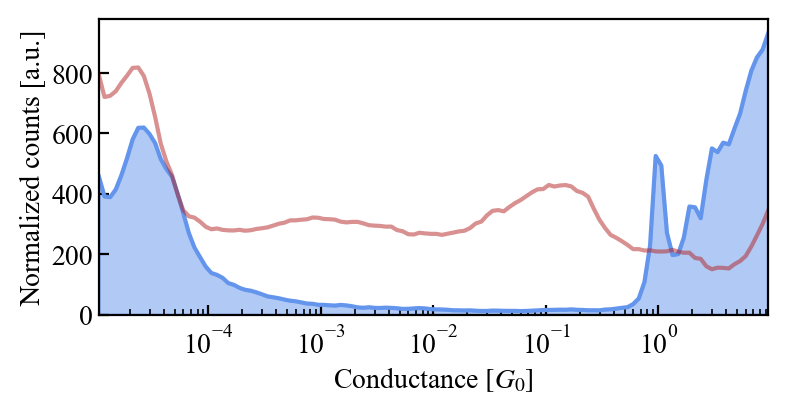

In [8]:
ax = hist_au_1.plot_hist_1d(dpi=200)
# ax.set_ylim(0, 400)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

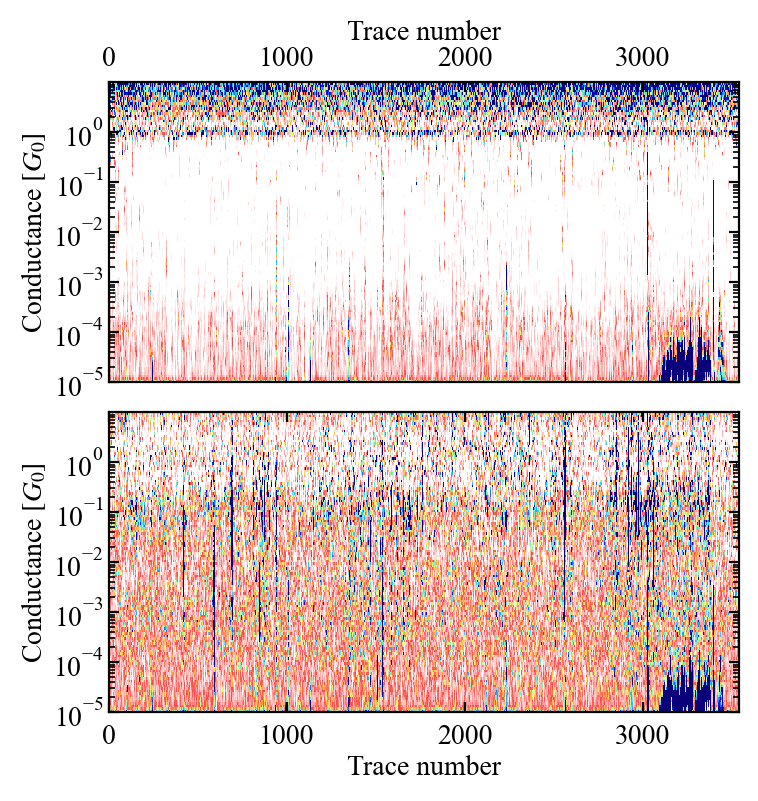

In [9]:
hist_au_1.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

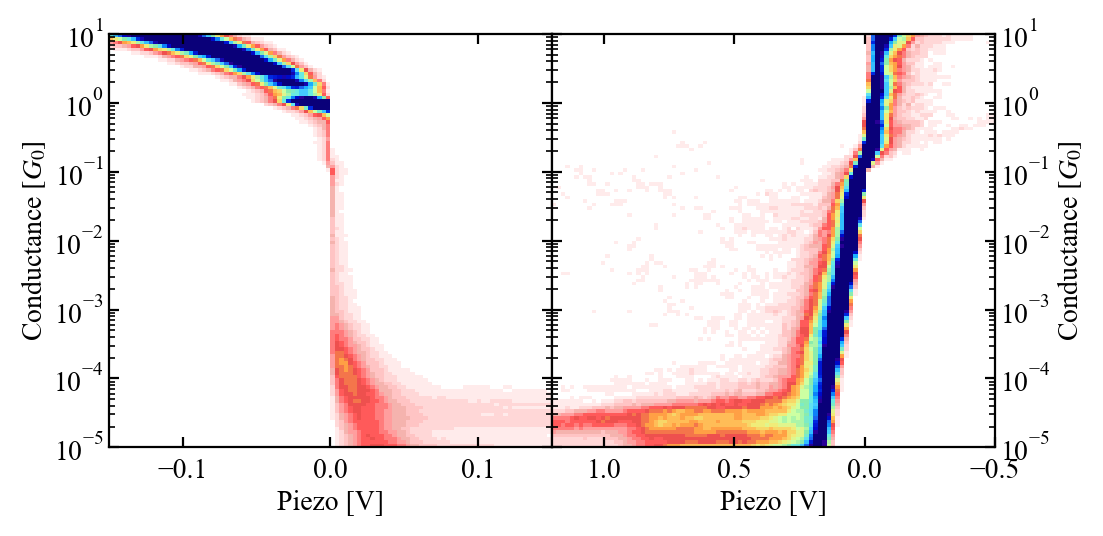

In [10]:
ax_pull, ax_push = hist_au_1.plot_hist_2d_both(dpi=200, vmax=100000)

In [11]:
hist_au_2 = Histogram(folder=home_folder,
                      start_trace = 8963, end_trace = 9651,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [12]:
hist_au_2.calc_stats(align_at=0.1,
                     range_pull=(-0.15, 0.15),
                     range_push=(-0.5, 1.2))

  0%|          | 0/689 [00:00<?, ?it/s]

Pull 2D histogram created from 689 traces
Push 2D histogram created from 689 traces


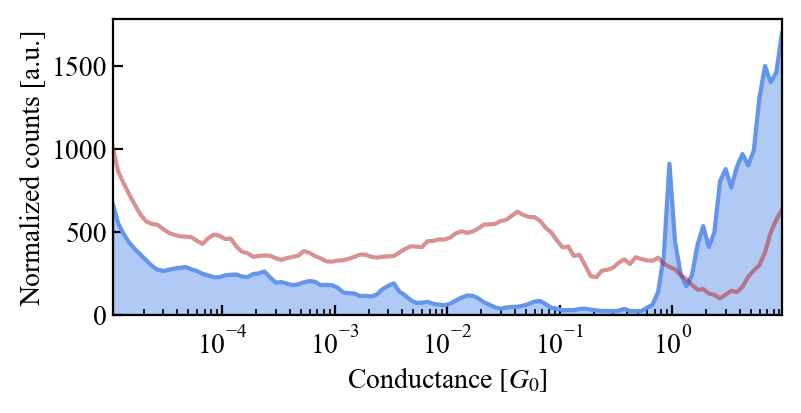

In [13]:
ax = hist_au_2.plot_hist_1d(dpi=200)
# ax.set_ylim(0, 400)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

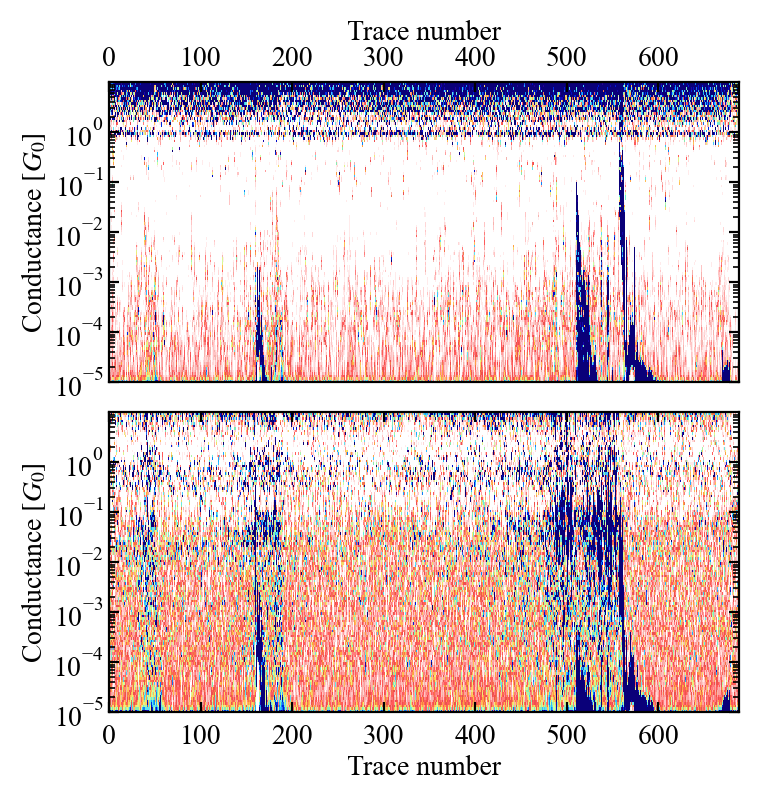

In [14]:
hist_au_2.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

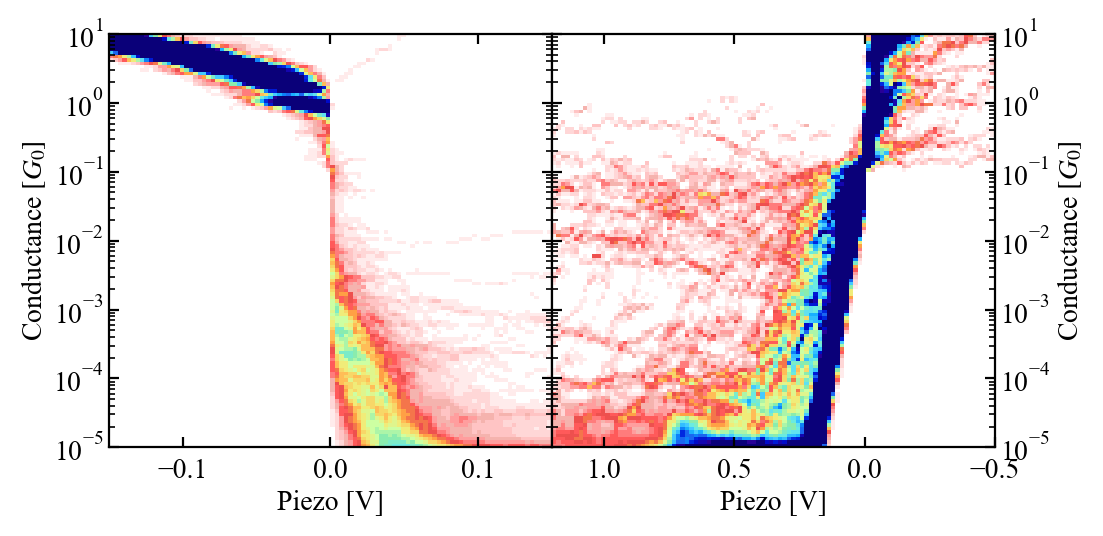

In [15]:
ax_pull, ax_push = hist_au_2.plot_hist_2d_both(dpi=200, vmax=10000)

In [16]:
hold_1 = np.arange(3543, 8962+1, 1)
hold_2 = np.arange(9652, 10584+1, 1)

In [19]:
np.concatenate((hold_1, hold_2))

array([ 3543,  3544,  3545, ..., 10582, 10583, 10584])

In [38]:
hold_stats_arr = np.zeros((len(hold_1)+len(hold_2), 10))
delete_rows = []
for i, which_trace in enumerate(tqdm(np.concatenate((hold_1, hold_2)))):

    trace_pair = TracePair(trace = which_trace, load_from=home_folder)
    try:
        hold_trace = HoldTrace(trace = which_trace, load_from=home_folder, bias_offset = 0,
                               r_serial_ohm = trace_pair.R_serial, sample_rate = trace_pair.sample_rate,
                               min_step_len = 140_000, min_height = 1, iv = None,
                               gain= 1e7)

        hold_stats_arr[i, 0] = trace_pair.trace_num
        hold_stats_arr[i, 1] = trace_pair.rate
        
        hold_stats_arr[i, 2] = trace_pair.hold_set_pull
        hold_stats_arr[i, 3] = trace_pair.hold_set_push
        hold_stats_arr[i, 4] = trace_pair.hold_conductance_pull
        hold_stats_arr[i, 5] = trace_pair.hold_conductance_push

        hold_stats_arr[i, 6] = hold_trace.G_hold_pull
        hold_stats_arr[i, 7] = hold_trace.G_hold_push
        hold_stats_arr[i, 8] = hold_trace.G_avg_pull
        hold_stats_arr[i, 9] = hold_trace.G_avg_push
    except MeasurementNotComplete:
        print(which_trace)
        delete_rows.append(i)

print(f'{len(delete_rows)} row(s) deleted.')
hold_stats_arr = np.delete(hold_stats_arr, delete_rows, axis=0)

  0%|          | 0/6353 [00:00<?, ?it/s]

8898
1 row(s) deleted.


In [39]:
hold_stats = pd.DataFrame(data=hold_stats_arr, columns=('trace', 'rate', 'set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'))

In [40]:
hold_stats.head()

,trace,rate,set_pull,set_push,trigger_pull,trigger_push,start_pull,start_push,end_pull,end_push
0,3543.0,0.5,0.01,0.001,0.011228,0.001016,0.000191,0.000954,0.000003,0.002431
1,3544.0,0.5,0.01,0.001,0.006003,0.001083,0.000016,0.001159,0.000003,0.007009
2,3545.0,0.5,0.01,0.001,0.006994,0.001032,0.000345,0.000704,0.000003,0.002088
3,3546.0,0.5,0.01,0.001,0.006676,0.001001,0.000086,0.000462,0.000004,0.011649
4,3547.0,0.5,0.01,0.001,0.013899,0.001120,0.000330,0.000725,0.000002,0.016674


In [43]:
hold_stats_log = hold_stats.copy()

cols = ['set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push']

hold_stats_log[cols] = hold_stats_log[cols].apply(lambda x: np.log10(x))

In [44]:
hold_stats_log.head()

,trace,rate,set_pull,set_push,trigger_pull,trigger_push,start_pull,start_push,end_pull,end_push
0,3543.0,0.5,-2.0,-3.0,-1.949698,-2.993201,-3.719676,-3.020416,-5.500325,-2.614188
1,3544.0,0.5,-2.0,-3.0,-2.221623,-2.965277,-4.785219,-2.935833,-5.492952,-2.154348
2,3545.0,0.5,-2.0,-3.0,-2.155299,-2.986372,-3.461956,-3.152268,-5.535533,-2.680194
3,3546.0,0.5,-2.0,-3.0,-2.175474,-2.999584,-4.063516,-3.335394,-5.451214,-1.933720
4,3547.0,0.5,-2.0,-3.0,-1.857016,-2.950864,-3.481825,-3.139626,-5.669953,-1.777969


In [64]:
trace_pair = TracePair(trace = hold_1[0], load_from=home_folder)

hold_1_did_not_break_pull, hold_1_did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                                 filter_condition=filter_traces.does_not_break_array,
                                                                                 traces=hold_1, min_val=2e-5,
                                                                                 bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                                                                 min_step_len=140_000)
trace_pair = TracePair(trace = hold_2[0], load_from=home_folder)

hold_2_did_not_break_pull, hold_2_did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                                 filter_condition=filter_traces.does_not_break_array,
                                                                                 traces=hold_2, min_val=2e-5,
                                                                                 bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                                                                 min_step_len=140_000)

  0%|          | 0/5420 [00:00<?, ?it/s]

  0%|          | 0/933 [00:00<?, ?it/s]

In [45]:
import seaborn as sns

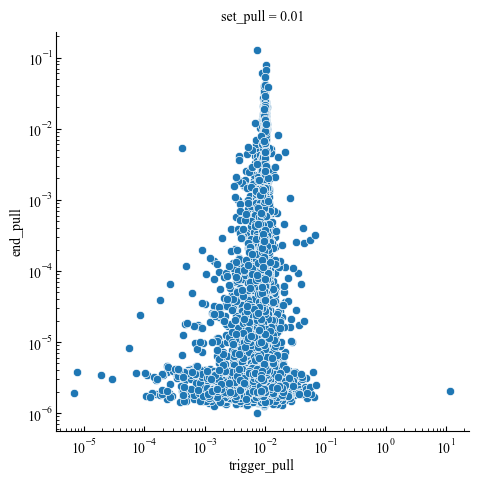

In [49]:
sns.relplot(data=hold_stats, x='trigger_pull', y='end_pull', col='set_pull', kind='scatter')
plt.xscale("log")
plt.yscale("log")

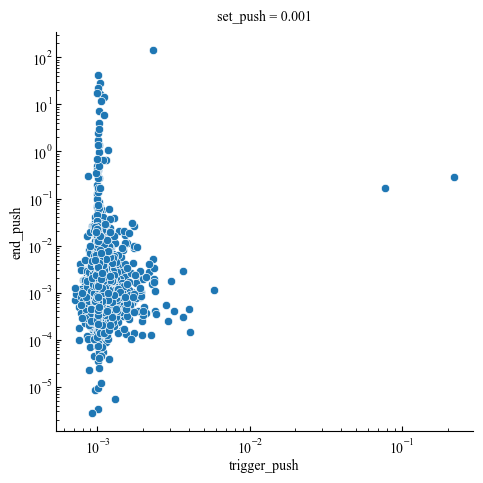

In [50]:
sns.relplot(data=hold_stats, x='trigger_push', y='end_push', col='set_push', kind='scatter')
plt.xscale("log")
plt.yscale("log")

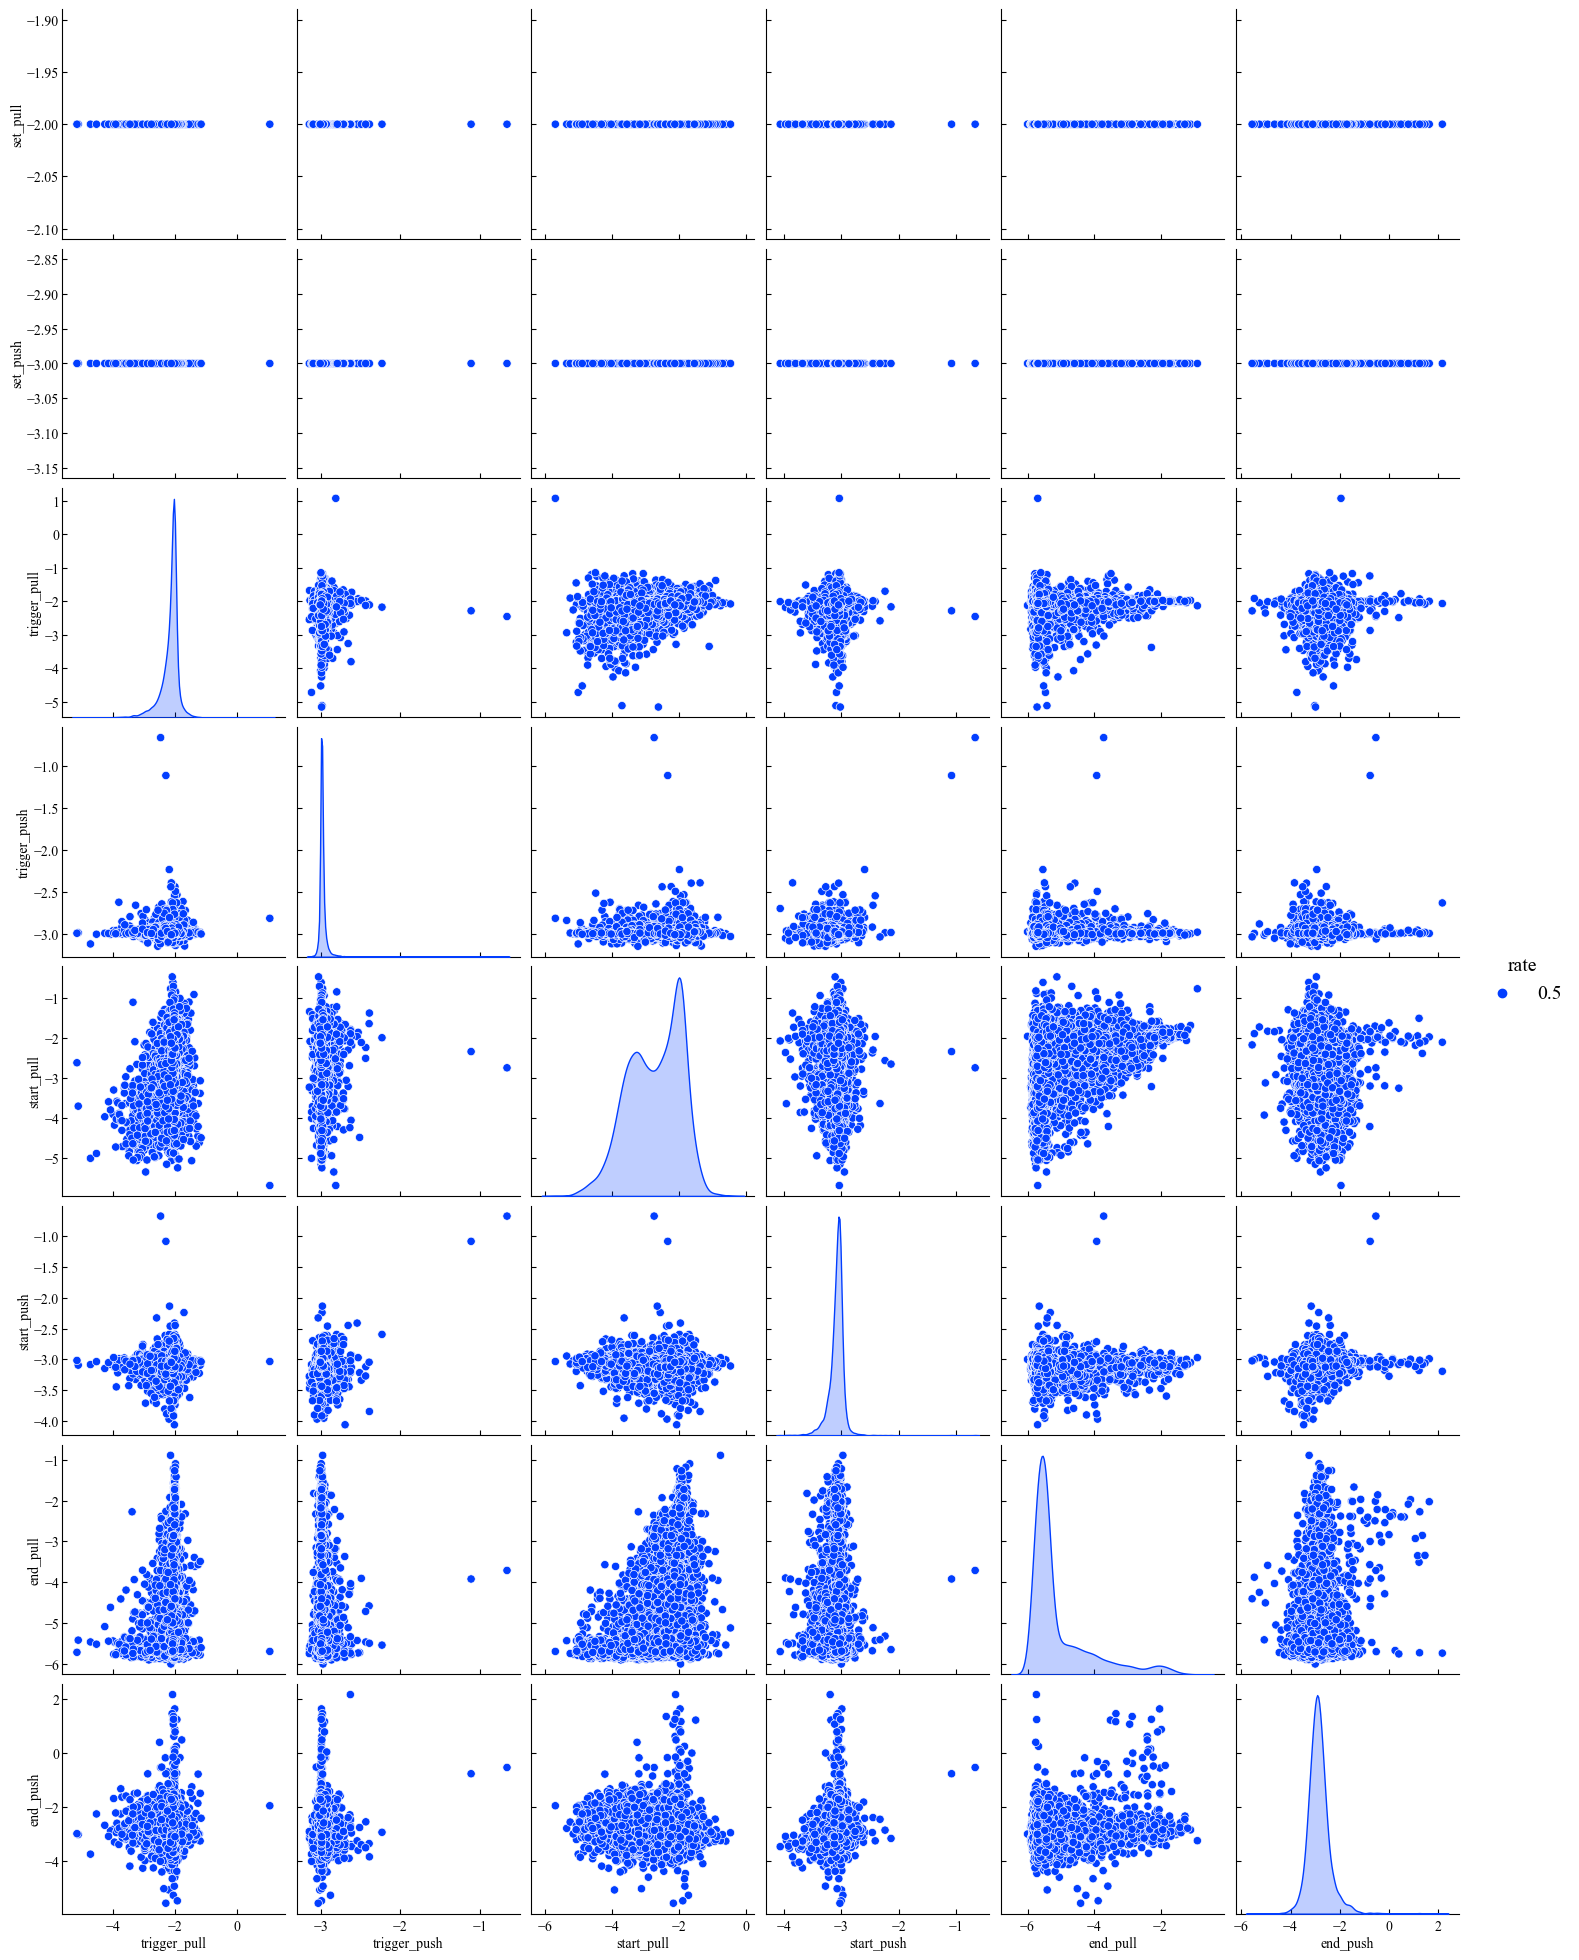

In [65]:
pp = sns.pairplot(data=hold_stats_log,
                  x_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  y_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  hue='rate', palette='bright')
        
plt.show()

In [66]:
hold_stats['did_not_break_pull'] = hold_stats['trace'].isin(hold_1_did_not_break_pull)
hold_stats['did_not_break_pull'] = hold_stats['trace'].isin(hold_2_did_not_break_pull)

hold_stats['did_not_break_push'] = hold_stats['trace'].isin(hold_1_did_not_break_push)
hold_stats['did_not_break_push'] = hold_stats['trace'].isin(hold_2_did_not_break_push)

hold_stats_log['did_not_break_pull'] = hold_stats_log['trace'].isin(hold_1_did_not_break_pull)
hold_stats_log['did_not_break_pull'] = hold_stats_log['trace'].isin(hold_2_did_not_break_pull)

hold_stats_log['did_not_break_push'] = hold_stats_log['trace'].isin(hold_1_did_not_break_push)
hold_stats_log['did_not_break_push'] = hold_stats_log['trace'].isin(hold_2_did_not_break_push)

In [67]:
hold_stats['rate'].value_counts()

0.5    6352
Name: rate, dtype: int64

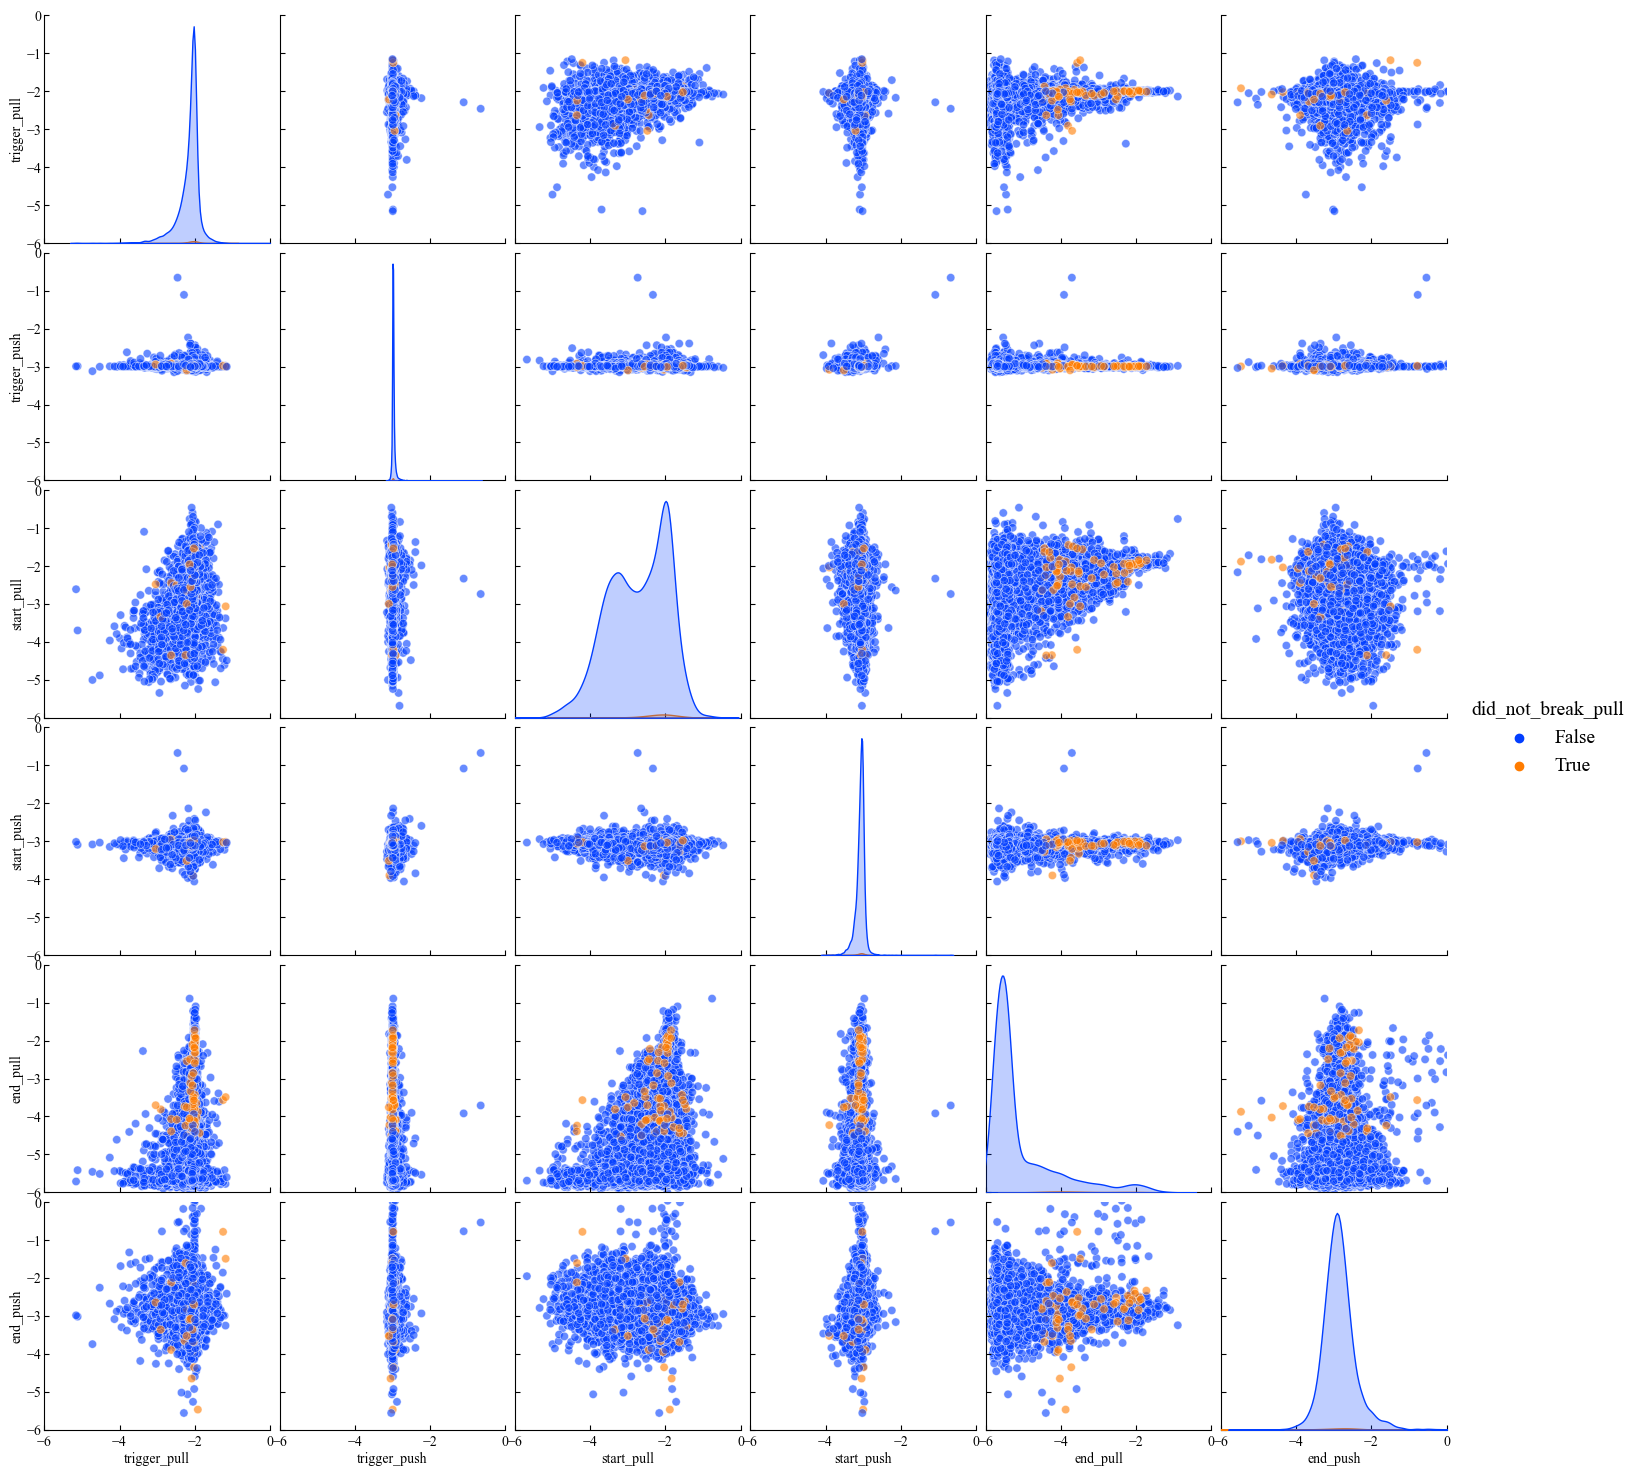

In [68]:
pp = sns.pairplot(data=hold_stats_log,
                  x_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  y_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  hue='did_not_break_pull', palette='bright', plot_kws={'alpha': 0.6})

for ax in pp.axes.flat:
    ax.set_xlim(-6, 0)
    ax.set_ylim(-6, 0)

plt.show()

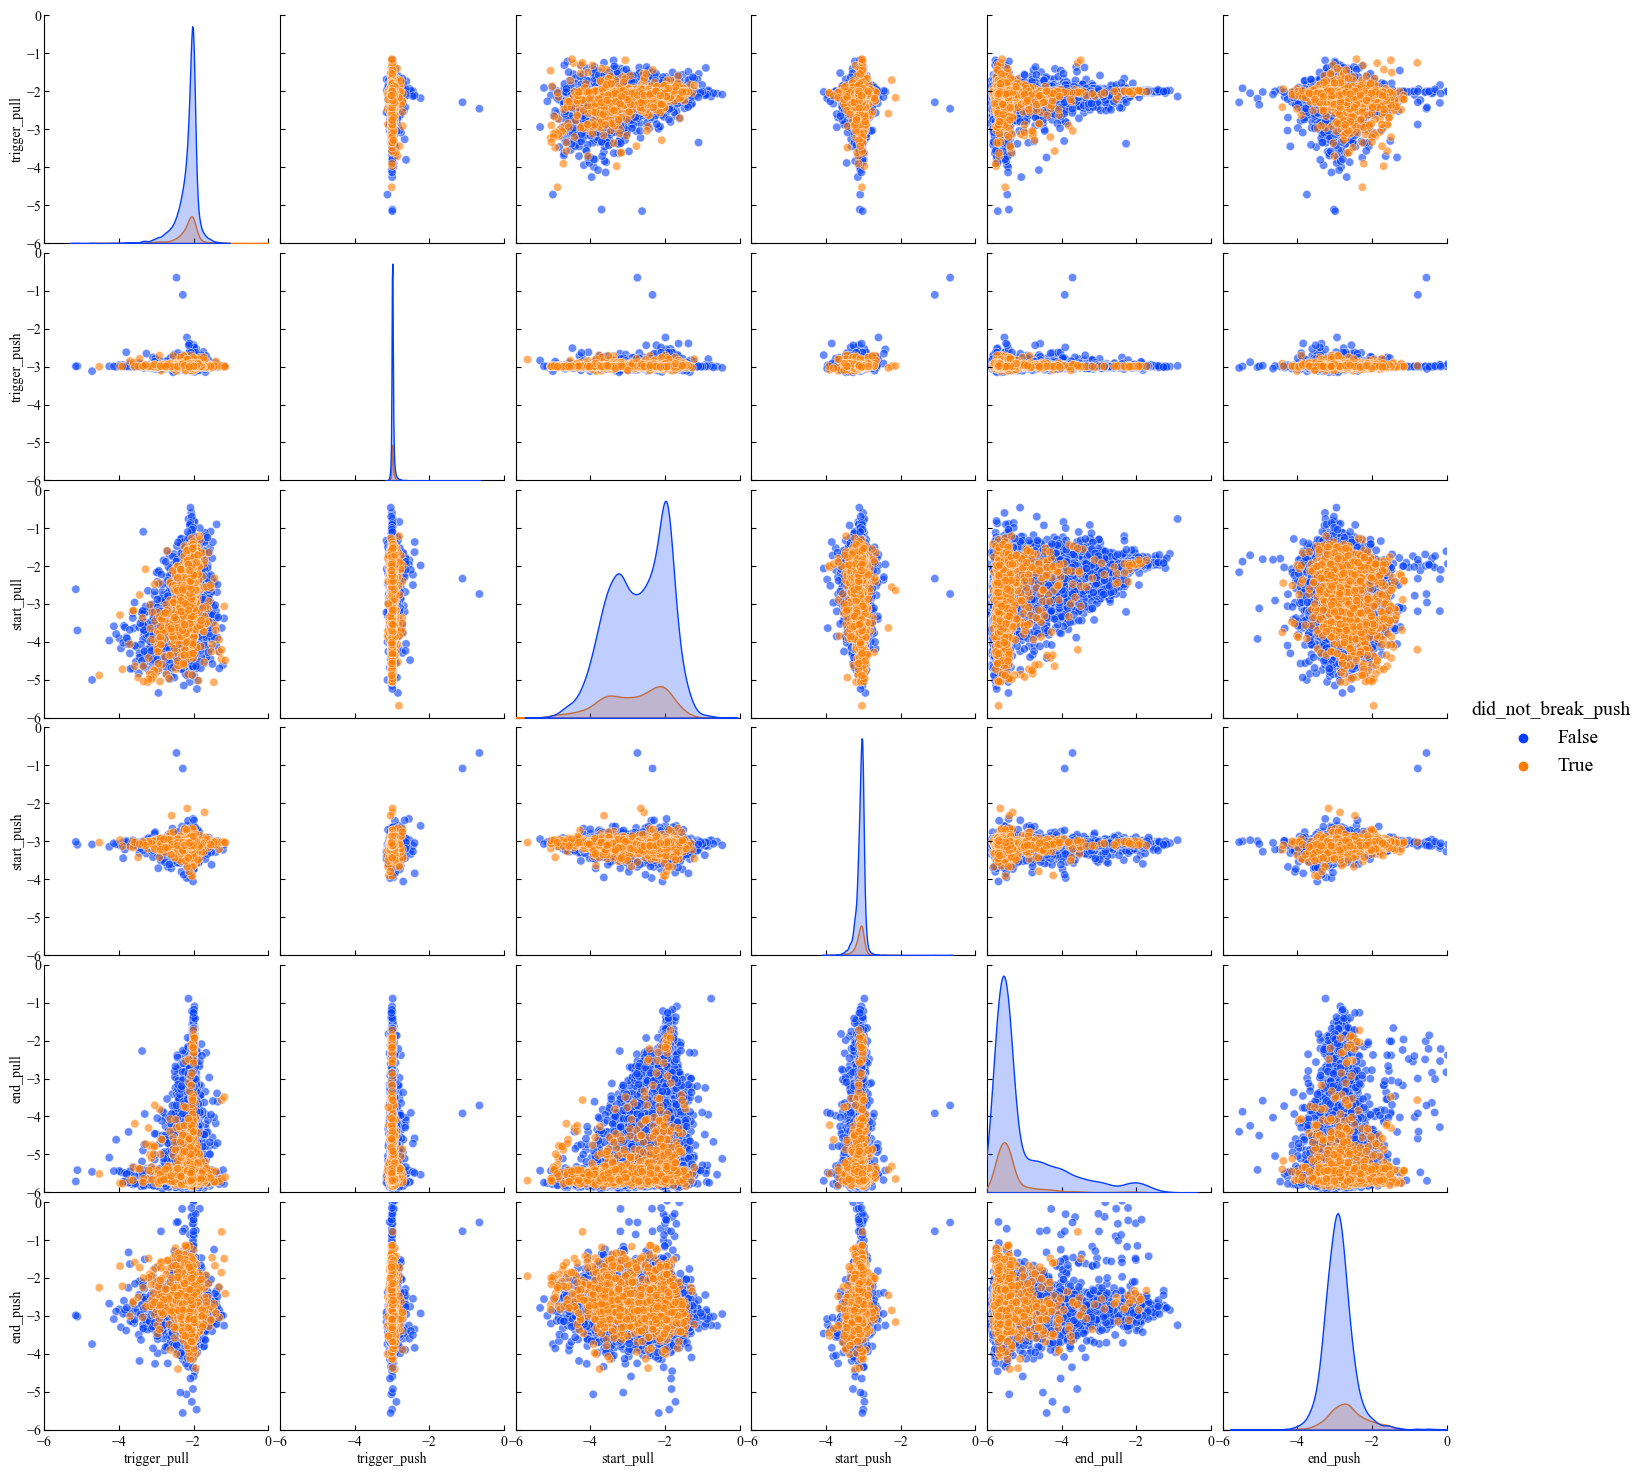

In [69]:
pp = sns.pairplot(data=hold_stats_log,
                  x_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  y_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  hue='did_not_break_push', palette='bright', plot_kws={'alpha': 0.6})

for ax in pp.axes.flat:
    ax.set_xlim(-6, 0)
    ax.set_ylim(-6, 0)

plt.show()